<a href="https://colab.research.google.com/github/daurice/Decision_tree/blob/main/Decision_Tree_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Implementation and Evaluation

In [30]:
# import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# read the data
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/decision tree/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [33]:

# List of columns to encode
columns_to_encode = ['outlook', 'temp', 'humidity', 'windy', 'play']

# Initialize the LabelEncoder
le = LabelEncoder()

# Dictionary to store mappings for each column
mappings = {}

# Loop through each column and apply LabelEncoder
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"Mapping for {col}: {mappings[col]}")

# Print the transformed DataFrame
print(df)

Mapping for outlook: {'overcast': 0, 'rainy': 1, 'sunny': 2}
Mapping for temp: {'cool': 0, 'hot': 1, 'mild': 2}
Mapping for humidity: {'high': 0, 'normal': 1}
Mapping for windy: {False: 0, True: 1}
Mapping for play: {'no': 0, 'yes': 1}
    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


In [34]:
'''
# transform and print the mapping
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(5):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(mapping)
print(df)
'''

'\n# transform and print the mapping\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nfor i in range(5): \n    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])\n    mapping = dict(zip(le.classes_, range(len(le.classes_))))\n    print(mapping)\nprint(df)\n'

In [35]:
# define the features and target variable
x = df.iloc[:,0:4]
y = df.iloc[:,4]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [36]:
# split the training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [38]:
y_train

,play
2,1
10,1
4,1
1,0
12,1
0,0
13,0
9,1
8,1
11,1


In [39]:
# build and train decision tree model
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DC=DecisionTreeClassifier(criterion='entropy') # criterion='entropy'
DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [40]:
print("Actual Values:")
print(y_test)
print("Predicted values:")
print(y_pred)

Actual Values:
3    1
7    0
6    1
Name: play, dtype: int64
Predicted values:
[0 0 1]


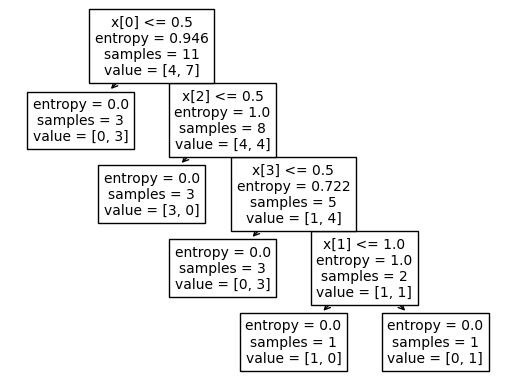

In [41]:
# plot decision tree
tree.plot_tree(DC)
plt.savefig('tennis_entropy.pdf')

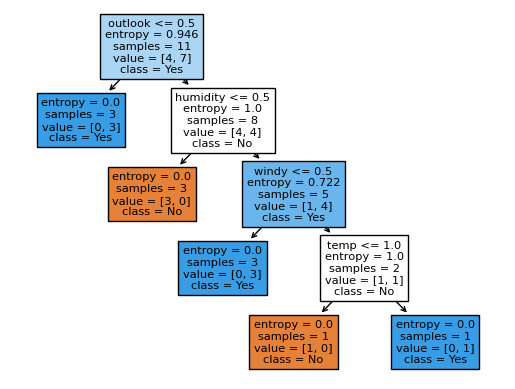

In [42]:
# generate customised decision tree with specific feature name and class name
fn=['outlook','temp','humidity','windy']
cn=['No', 'Yes']
tree.plot_tree(DC,
               feature_names = fn,
               class_names=cn,
               filled = True);

# Model Evaluation

In [43]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.6666666666666666


In [44]:
cf=confusion_matrix(y_test,y_pred)

In [45]:
print(cf)

[[1 0]
 [1 1]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



x[0]=outlook
x[1]=temp
x[2]=humidity
x[3]=windy